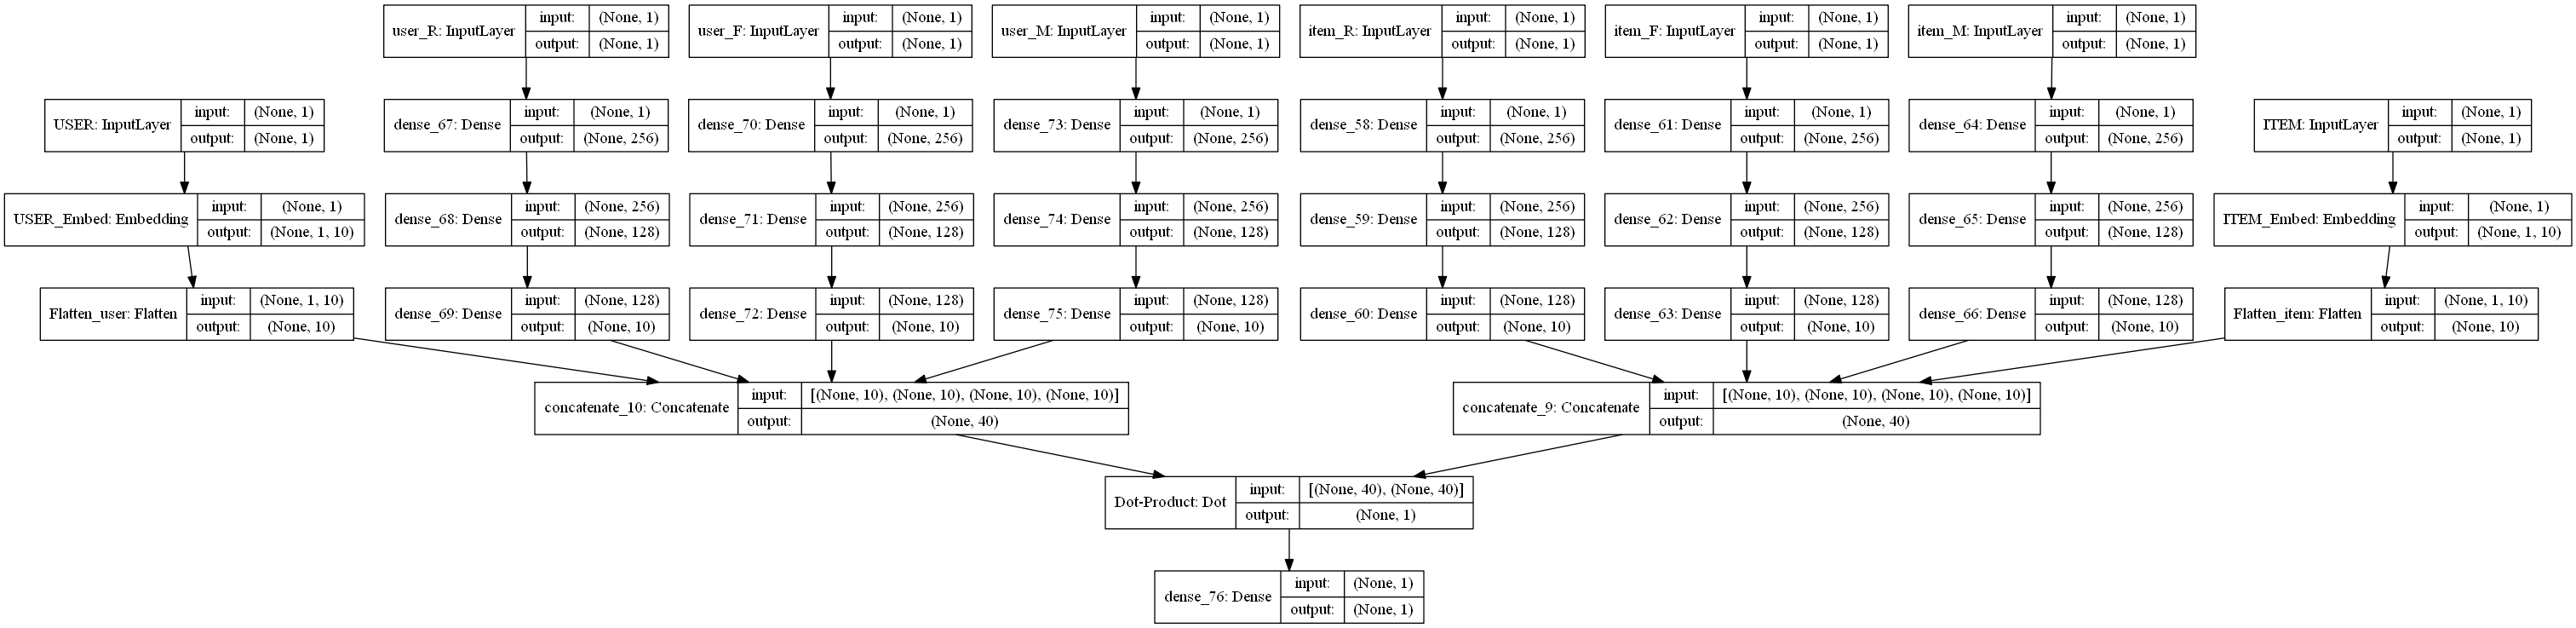

In [1]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=1.0):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

KTF.set_session(get_session())

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
from keras.layers import Input, Embedding, Flatten, Dot, Dense, concatenate, Activation, BatchNormalization
from keras.models import Model, model_from_json
from keras.initializers import glorot_normal
import h5py

from keras.utils import plot_model

from IPython.display import Image

In [3]:
buyer_RFM = pd.read_csv('buyerRFM_RANK_ALL.csv')
item_RFM = pd.read_csv('productRFM_RANK_ALL.csv')

In [4]:
U_RFM = buyer_RFM[['buyer', 'recency.1', 'freq.1', 'amount.1']]
I_RFM = item_RFM[['product', 'recency.1', 'freq.1', 'amount.1']]

In [5]:
U_RFM.columns = 'user', 'user_R', 'user_F', 'user_M'
I_RFM.columns = 'item', 'item_R', 'item_F', 'item_M'

In [6]:
raw = pd.read_csv('linkshops.order.csv')

In [7]:
raw = raw.loc[:,['buyer','product','created']]
raw['created'] = pd.to_datetime(raw.created)
raw['created'] = [x.month for x in raw['created']]
raw.columns = ['user','item','month']
print(raw.shape)
raw.head()

(243169, 3)


,user,item,month
0,34990,1047047,7
1,54804,940522,7
2,54804,1029752,7
3,54804,1045597,7
4,54804,1066000,7


In [8]:
from sklearn.metrics import roc_curve

In [9]:
from keras.optimizers import Adam
from keras.optimizers import rmsprop

In [16]:
from keras.optimizers import Adam
from keras.optimizers import rmsprop


#i = 0
s = 7
top_n=10
user_factor = 27
item_factor = 27
factors = 9

BATCH_SIZE = 256 #256
LEARNING_RATE = 0.0001
epo = 40
rfm_dense1 = 32
#rfm_dense2 = 60
dot_dense1 = 16
dot_dense2 = 8

#optimizer = rmsprop(lr = LEARNING_RATE)
optimizer = Adam(lr = LEARNING_RATE)

In [17]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

################### trained by 7 and predict 8
Train on 75096 samples, validate on 18774 samples
Epoch 1/40
75096/75096 [==============================] - 13s 171us/step - loss: 0.6680 - val_loss: 0.5526
Epoch 2/40
75096/75096 [==============================] - 8s 110us/step - loss: 0.5155 - val_loss: 0.4585
Epoch 3/40
75096/75096 [==============================] - 8s 110us/step - loss: 0.3944 - val_loss: 0.3371
Epoch 4/40
75096/75096 [==============================] - 8s 109us/step - loss: 0.2763 - val_loss: 0.2280
Epoch 5/40
75096/75096 [==============================] - 8s 110us/step - loss: 0.1809 - val_loss: 0.1501
Epoch 6/40
75096/75096 [==============================] - 8s 109us/step - loss: 0.1184 - val_loss: 0.0994
Epoch 7/40
75096/75096 [==============================] - 8s 109us/step - loss: 0.0823 - val_loss: 0.0757
Epoch 8/40
75096/75096 [==============================] - 8s 110us/step - loss: 0.0626 - val_loss: 0.0613
Epoch 9/40
75096/75096 [==============================

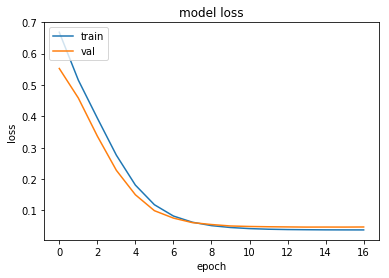

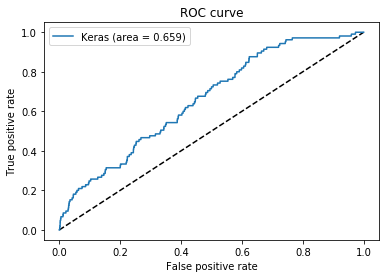

auc :  0.6591854044602594
recall :  0.3238095238095238
Saved model to disk
################### trained by 8 and predict 9
Train on 34380 samples, validate on 8595 samples
Epoch 1/40
34380/34380 [==============================] - 9s 265us/step - loss: 0.5915 - val_loss: 0.3865
Epoch 2/40
34380/34380 [==============================] - 4s 110us/step - loss: 0.3640 - val_loss: 0.2895
Epoch 3/40
34380/34380 [==============================] - 4s 111us/step - loss: 0.2609 - val_loss: 0.2118
Epoch 4/40
34380/34380 [==============================] - 4s 110us/step - loss: 0.1903 - val_loss: 0.1590
Epoch 5/40
34380/34380 [==============================] - 4s 111us/step - loss: 0.1427 - val_loss: 0.1236
Epoch 6/40
34380/34380 [==============================] - 4s 111us/step - loss: 0.1112 - val_loss: 0.1011
Epoch 7/40
34380/34380 [==============================] - 4s 111us/step - loss: 0.0904 - val_loss: 0.0842
Epoch 8/40
34380/34380 [==============================] - 4s 111us/step - loss: 0.0764 

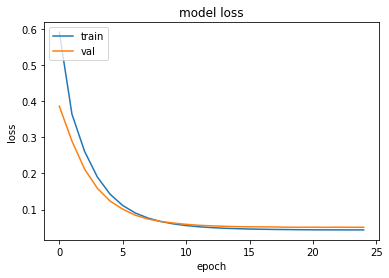

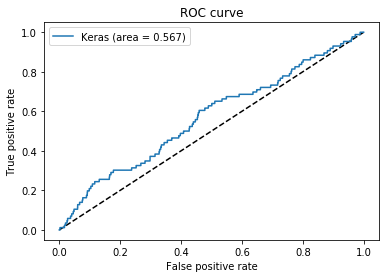

auc :  0.567039773196113
recall :  0.29069767441860467
Saved model to disk
################### trained by 9 and predict 10
Train on 68519 samples, validate on 17130 samples
Epoch 1/40
68519/68519 [==============================] - 14s 202us/step - loss: 0.4839 - val_loss: 0.3320
Epoch 2/40
68519/68519 [==============================] - 8s 112us/step - loss: 0.2206 - val_loss: 0.1508
Epoch 3/40
68519/68519 [==============================] - 8s 110us/step - loss: 0.1108 - val_loss: 0.0871
Epoch 4/40
68519/68519 [==============================] - 8s 111us/step - loss: 0.0713 - val_loss: 0.0663
Epoch 5/40
68519/68519 [==============================] - 8s 112us/step - loss: 0.0554 - val_loss: 0.0544
Epoch 6/40
68519/68519 [==============================] - 8s 112us/step - loss: 0.0482 - val_loss: 0.0498
Epoch 7/40
68519/68519 [==============================] - 8s 112us/step - loss: 0.0445 - val_loss: 0.0474
Epoch 8/40
68519/68519 [==============================] - 8s 111us/step - loss: 0.04

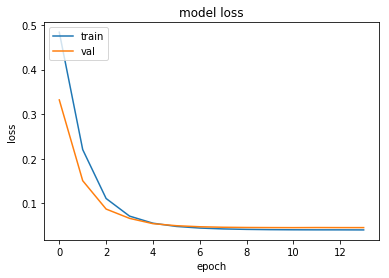

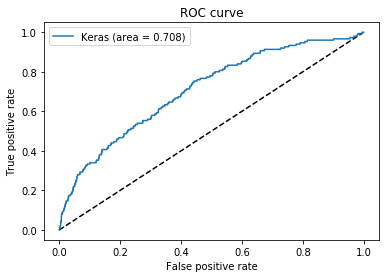

auc :  0.7079046127026009
recall :  0.4666666666666667
Saved model to disk
################### trained by 10 and predict 11
Train on 180420 samples, validate on 45106 samples
Epoch 1/40
180420/180420 [==============================] - 27s 149us/step - loss: 0.2493 - val_loss: 0.0770
Epoch 2/40
180420/180420 [==============================] - 20s 112us/step - loss: 0.0528 - val_loss: 0.0413
Epoch 3/40
180420/180420 [==============================] - 20s 112us/step - loss: 0.0371 - val_loss: 0.0364
Epoch 4/40
180420/180420 [==============================] - 20s 112us/step - loss: 0.0344 - val_loss: 0.0357
Epoch 5/40
180420/180420 [==============================] - 20s 111us/step - loss: 0.0339 - val_loss: 0.0354
Epoch 6/40
180420/180420 [==============================] - 20s 112us/step - loss: 0.0337 - val_loss: 0.0354
Epoch 7/40
180420/180420 [==============================] - 20s 112us/step - loss: 0.0337 - val_loss: 0.0354
Epoch 8/40
180420/180420 [==============================] - 20

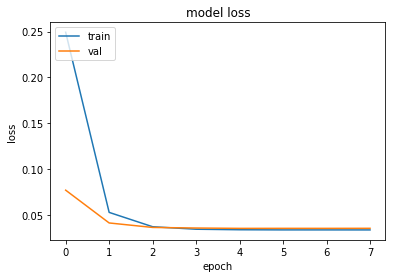

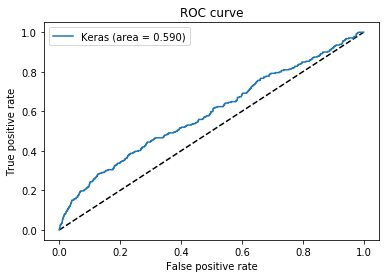

auc :  0.5900656848424355
recall :  0.10752688172043011
Saved model to disk
################### trained by 11 and predict 12
Train on 124694 samples, validate on 31174 samples
Epoch 1/40
124694/124694 [==============================] - 22s 176us/step - loss: 0.4358 - val_loss: 0.2357
Epoch 2/40
124694/124694 [==============================] - 14s 113us/step - loss: 0.1361 - val_loss: 0.0824
Epoch 3/40
124694/124694 [==============================] - 14s 113us/step - loss: 0.0587 - val_loss: 0.0495
Epoch 4/40
124694/124694 [==============================] - 14s 112us/step - loss: 0.0404 - val_loss: 0.0409
Epoch 5/40
124694/124694 [==============================] - 14s 114us/step - loss: 0.0348 - val_loss: 0.0384
Epoch 6/40
124694/124694 [==============================] - 14s 113us/step - loss: 0.0329 - val_loss: 0.0373
Epoch 7/40
124694/124694 [==============================] - 14s 112us/step - loss: 0.0322 - val_loss: 0.0370
Epoch 8/40
124694/124694 [==============================] - 1

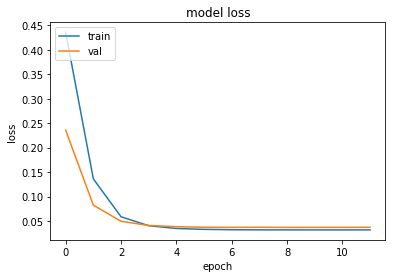

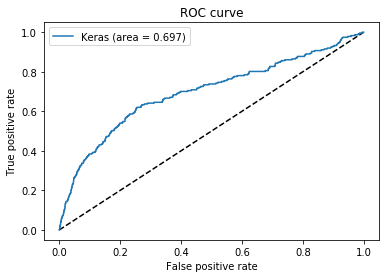

auc :  0.6968013540836436
recall :  0.3628691983122363
Saved model to disk
##################DONE##############


In [18]:
i = 0
f1_score = []
re_score = []
pr_score = []
auc_score = []
fpr_score = []
tpr_score = []
while i<=4:
    raw02 = raw[((raw.month==(s+i))|(raw.month==(s+1+i)))]
    raw02 = raw02.drop_duplicates()
    train = raw02[raw02.month==(s+i)].drop('month',axis=1)
    test = raw02[raw02.month==(s+1+i)].drop('month',axis=1)
    train['rating'] = 1
    test['rat'] = 1
    item_list = train.item.value_counts()[(train.item.value_counts()>=10)].index
    train = pd.pivot_table(train, values='rating', index=['item'], columns=['user'], aggfunc=sum)
    train = train.unstack().reset_index().fillna(0)
    train.columns = ['user','item','rating']
    train = train[train.item.isin(item_list)]
    train.rating = train.rating.astype('int')
    train['idx']= 'train'
    train = train.merge(I_RFM, on='item', how='left').fillna(0)
    train = train.merge(U_RFM, on='user', how='left').fillna(0)
    test = train.merge(test, how = 'left', on=['user','item']).fillna(0)
    test = test.drop(['item_R', 'item_F', 'item_M', 'user_R', 'user_F', 'user_M'], axis=1)
    test = test[(test.rating!=1)]
    test['rating'] = test.rat.astype('int')
    test = test.drop('rat',axis=1)
    test['idx'] = 'test'
    test = test.merge(I_RFM, on='item', how='left').fillna(0)
    test = test.merge(U_RFM, on='user', how='left').fillna(0)
    raw02 = pd.concat([train,test])
    raw02_org = pd.concat([train,test])
    raw02['user'] = raw02.user.astype('category').cat.codes.values
    raw02['item'] = raw02.item.astype('category').cat.codes.values
    train = raw02[raw02.idx=='train']
    train = train.drop('idx',axis=1)
    test = raw02[raw02.idx=='test']
    test = test.drop('idx',axis=1)
#    del raw02
    n_user = train.user.nunique()
    n_item = train.item.nunique()

    #### model
    item_R_input = Input(shape=[1], name='item_R')
    item_R_dense = Dense(rfm_dense1)(item_R_input)
    item_R_dense = BatchNormalization()(item_R_dense)
    item_R_dense = Dense(factors)(item_R_dense)
    item_R_dense = BatchNormalization()(item_R_dense)
    item_R_out = Activation('relu')(item_R_dense)
    
    item_F_input = Input(shape=[1], name='item_F')
    item_F_dense = Dense(rfm_dense1)(item_F_input)
    item_F_dense = BatchNormalization()(item_F_dense)
    item_F_dense = Dense(factors)(item_F_dense)
    item_F_dense = BatchNormalization()(item_F_dense)
    item_F_out = Activation('relu')(item_F_dense)
    
    item_M_input = Input(shape=[1], name='item_M')
    item_M_dense = Dense(rfm_dense1)(item_M_input)
    item_M_dense = BatchNormalization()(item_M_dense)
    item_M_dense = Dense(factors)(item_M_dense)
    item_M_dense = BatchNormalization()(item_M_dense)
    item_M_out = Activation('relu')(item_M_dense)
    
    user_R_input = Input(shape=[1], name='user_R')
    user_R_dense = Dense(rfm_dense1)(user_R_input)
    user_R_dense = BatchNormalization()(user_R_dense)
    user_R_dense = Dense(factors)(user_R_dense)
    user_R_dense = BatchNormalization()(user_R_dense)
    user_R_out = Activation('relu')(user_R_dense)
    
    user_F_input = Input(shape=[1], name='user_F')
    user_F_dense = Dense(rfm_dense1)(user_F_input)
    user_F_dense = BatchNormalization()(user_F_dense)
    user_F_dense = Dense(factors)(user_F_dense)
    user_F_dense = BatchNormalization()(user_F_dense)
    user_F_out = Activation('relu')(user_F_dense)
    
    user_M_input = Input(shape=[1], name='user_M')
    user_M_dense = Dense(rfm_dense1)(user_M_input)
    user_M_dense = BatchNormalization()(user_M_dense)
    user_M_dense = Dense(factors)(user_M_dense)
    user_M_dense = BatchNormalization()(user_M_dense)
    user_M_out = Activation('relu')(user_M_dense)
    
    user_input = Input(shape=[1], name='USER')
    user_em = Embedding(n_user+1, user_factor, name='USER_Embed')(user_input)
    user_vec = Flatten(name='Flatten_user')(user_em)
    
    item_input = Input(shape=[1], name='ITEM')
    item_em = Embedding(n_item+1, item_factor, name='ITEM_Embed')(item_input)
    item_vec = Flatten(name='Flatten_item')(item_em)
    
    item_concatenated = concatenate([item_R_out, item_F_out, item_M_out, item_vec], axis=-1)
    user_concatenated = concatenate([user_R_out, user_F_out, user_M_out, user_vec], axis=-1)
    
    prod = Dot(name="Dot-Product", axes=1)([item_concatenated, user_concatenated])
    prod = Dense(dot_dense1)(prod)
    prod = BatchNormalization()(prod)
    prod = Dense(dot_dense2)(prod)
#    prod = BatchNormalization()(prod)
#    prod = Dense(dot_dense3)(prod)
    out = Dense(1, activation='sigmoid')(prod)
    
    model = Model([user_input, item_input, item_R_input, item_F_input, item_M_input, user_R_input, user_F_input, user_M_input], out)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy')


    
    print('###################', 'trained by', s+i, 'and predict', int(s+i)+1)
    
    history = model.fit([train.user, train.item, train.item_R, train.item_F, train.item_M, train.user_R, train.user_F, train.user_M],
                        train.rating, batch_size = BATCH_SIZE,
                        epochs=epo, verbose=1, validation_split= 0.2, callbacks = [early_stop]) 
    
    y_pred = model.predict([test.user, test.item, test.item_R, test.item_F, test.item_M, test.user_R, test.user_F, test.user_M])
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(test.rating, y_pred)    
    fpr_score.append(np.array(fpr).mean())
    tpr_score.append(np.array(tpr).mean())
    
    from sklearn.metrics import auc
    auc = auc(fpr, tpr)
    
    auc_score.append(auc)
    
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
    #plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    
    test['prob'] = model.predict([test.user, test.item, test.item_R, test.item_F, test.item_M, test.user_R, test.user_F, test.user_M])
    test = test.reset_index()
    test = test.drop('index',axis=1)
    test01 = test.groupby('user')['prob'].nlargest(top_n).reset_index()
    test01 = test.iloc[list(test01.iloc[:,1])]
    re = test01.rating.sum() / test.rating.sum()
    pr = test01.rating.sum() / (test.user.nunique() * top_n)
    f1 = 2*(pr*re)  / (pr+re)
    
    print('auc : ',auc)
    print('recall : ',re)
    f1_score.append(f1)
    re_score.append(re)
    pr_score.append(pr)
    
    ### save model weight
    model_json = model.to_json()
    with open("model_0227"+str(i)+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model_0227"+str(i)+".h5")
    print("Saved model to disk")
    
    i = i+1

print('##################DONE##############')
#model.summary()

In [19]:
print(auc_score, '\n #### mean :', np.array(auc_score).mean())

[0.6591854044602594, 0.567039773196113, 0.7079046127026009, 0.5900656848424355, 0.6968013540836436] 
 #### mean : 0.6441993658570104


In [20]:
print(re_score, '\n #### mean :', np.array(re_score).mean())

[0.3238095238095238, 0.29069767441860467, 0.4666666666666667, 0.10752688172043011, 0.3628691983122363] 
 #### mean : 0.3103139889854923


In [22]:
objects = ('07-08', '08-09', '09-10', '10-11', '11-12')
y_pos = np.arange(len(objects))

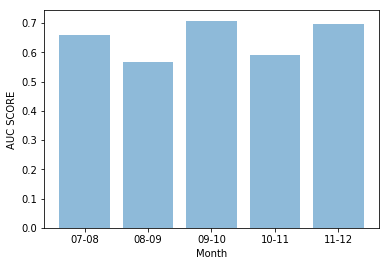

In [31]:
plt.bar(y_pos, auc_score, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('AUC SCORE')
plt.xlabel('Month')
 
plt.show()

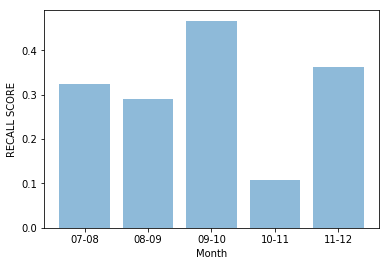

In [32]:
plt.bar(y_pos, re_score, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RECALL SCORE')
plt.xlabel('Month')
 
plt.show()